# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# 1. Import pustaka untuk analisis data
import pandas as pd
import numpy as np

# 2. Import pustaka untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Import pustaka untuk pemrosesan data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import os

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
# Import library yang diperlukan
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Tentukan lokasi dataset di Google Drive
dataset_path = '/content/drive/My Drive/clustering_results.csv'  # Ubah sesuai lokasi dataset Anda

# Memuat dataset dari Google Drive
df = pd.read_csv(dataset_path)

# Menampilkan beberapa baris pertama untuk verifikasi
print("Dataset berhasil dimuat. Berikut 5 baris pertama:")
print(df.head())

# Menampilkan informasi dataset
print("\nInformasi dataset:")
print(df.info())


Mounted at /content/drive
Dataset berhasil dimuat. Berikut 5 baris pertama:
   amount  use_chip_encoded     mcc  merchant_id  is_weekend  cluster_kmeans  \
0  -77.00               0.0  5499.0      59935.0         0.0               2   
1   14.57               0.0  5311.0      67570.0         0.0               1   
2   80.00               0.0  4829.0      27092.0         0.0               7   
3  200.00               0.0  4829.0      27092.0         0.0               7   
4   46.41               0.0  5813.0      13051.0         0.0               3   

   cluster_agglomerative  
0                      0  
1                      0  
2                      1  
3                      1  
4                      1  

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount                 10000 non-null  float6

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# Memisahkan fitur dan label
# Define features (X) and target (y)
X = df[['merchant_id', 'mcc', 'amount', 'is_weekend']]  # Fitur terpilih
y = df['cluster_kmeans']  # Target variabel

# Membagi data menjadi training dan test set
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Menampilkan hasil pembagian
print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Test Set: {X_test.shape}, {y_test.shape}")

# Menampilkan contoh data
print("\nTraining Data Features:")
print(X_train.head())
print("\nTraining Data Labels:")
print(y_train.head())


Training Set: (7000, 4), (7000,)
Test Set: (3000, 4), (3000,)

Training Data Features:
      merchant_id     mcc  amount  is_weekend
1901      59474.0  3722.0  150.61         0.0
6293      18001.0  6300.0  510.80         1.0
5574      57998.0  5300.0  111.21         1.0
4594      92542.0  5813.0    7.32         1.0
8801      14528.0  5499.0    1.37         1.0

Training Data Labels:
1901    2
6293    3
5574    2
4594    9
8801    3
Name: cluster_kmeans, dtype: int64


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Evaluation (using training data):
Accuracy: 0.7309

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.38      0.53       428
           1       0.73      0.58      0.65       747
           2       0.74      0.91      0.81      1116
           3       0.86      0.75      0.80       955
           4       0.76      0.63      0.69       684
           5       0.54      0.54      0.54       635
           6       0.90      0.93      0.92       389
           7       0.66      0.92      0.77       926
           8       0.79      0.85      0.81       763
           9       0.55      0.46      0.50       357

    accuracy                           0.73      7000
   macro avg       0.74      0.69      0.70      7000
weighted avg       0.74      0.73      0.72      7000



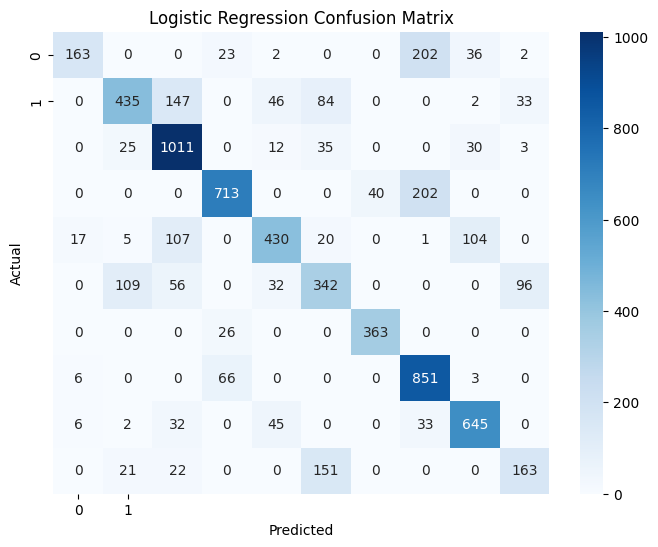

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_train)  # Menggunakan data latih untuk prediksi

# Evaluasi model Logistic Regression
print("Logistic Regression Evaluation (using training data):")
print(f"Accuracy: {accuracy_score(y_train, y_pred_logreg):.4f}")
print("\nClassification Report:\n", classification_report(y_train, y_pred_logreg))

# Confusion Matrix
cm_logreg = confusion_matrix(y_train, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest Evaluation (using training data):
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       428
           1       1.00      1.00      1.00       747
           2       1.00      1.00      1.00      1116
           3       1.00      1.00      1.00       955
           4       1.00      1.00      1.00       684
           5       1.00      1.00      1.00       635
           6       1.00      1.00      1.00       389
           7       1.00      1.00      1.00       926
           8       1.00      1.00      1.00       763
           9       1.00      1.00      1.00       357

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



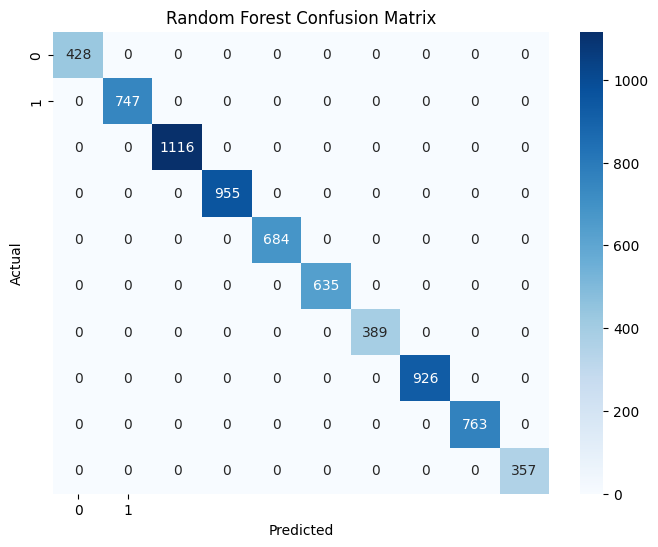

In [ ]:
# 2. Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_train)  # Menggunakan data latih untuk prediksi

# Evaluasi model Random Forest
print("Random Forest Evaluation (using training data):")
print(f"Accuracy: {accuracy_score(y_train, y_pred_rf):.4f}")
print("\nClassification Report:\n", classification_report(y_train, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_train, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

K-Nearest Neighbors (KNN) Evaluation (using training data):
Accuracy: 0.9986

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       428
           1       1.00      1.00      1.00       747
           2       1.00      1.00      1.00      1116
           3       1.00      1.00      1.00       955
           4       1.00      1.00      1.00       684
           5       1.00      1.00      1.00       635
           6       1.00      1.00      1.00       389
           7       1.00      1.00      1.00       926
           8       0.99      1.00      1.00       763
           9       1.00      1.00      1.00       357

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



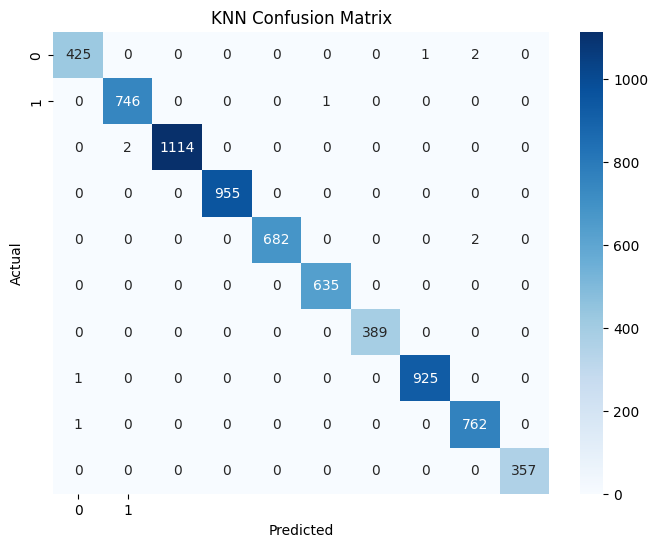

In [ ]:
# 3. K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)  # Menggunakan data latih untuk prediksi

# Evaluasi model KNN
print("K-Nearest Neighbors (KNN) Evaluation (using training data):")
print(f"Accuracy: {accuracy_score(y_train, y_pred_knn):.4f}")
print("\nClassification Report:\n", classification_report(y_train, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_train, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Decision Tree Evaluation (using training data):
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       428
           1       1.00      1.00      1.00       747
           2       1.00      1.00      1.00      1116
           3       1.00      1.00      1.00       955
           4       1.00      1.00      1.00       684
           5       1.00      1.00      1.00       635
           6       1.00      1.00      1.00       389
           7       1.00      1.00      1.00       926
           8       1.00      1.00      1.00       763
           9       1.00      1.00      1.00       357

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



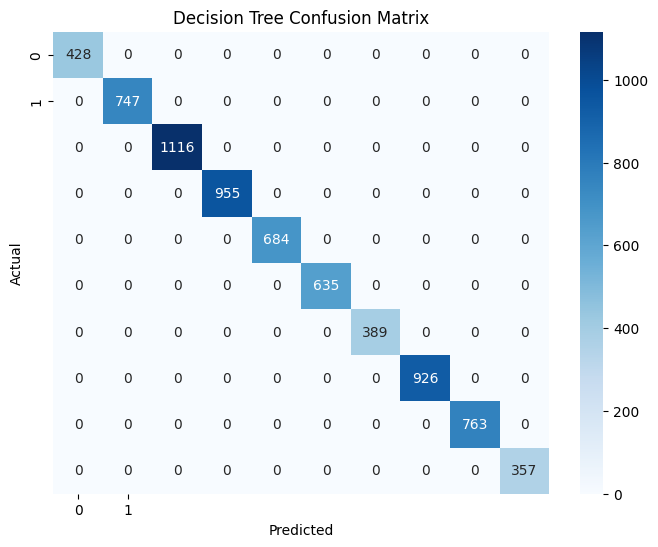

In [ ]:
# 4. Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_train)  # Menggunakan data latih untuk prediksi

# Evaluasi model Decision Tree
print("Decision Tree Evaluation (using training data):")
print(f"Accuracy: {accuracy_score(y_train, y_pred_dt):.4f}")
print("\nClassification Report:\n", classification_report(y_train, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_train, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Membuat model Random Forest
clf = RandomForestClassifier(random_state=42)

# Melatih model
clf.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = clf.predict(X_test)

# Menghitung F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil F1-Score
print(f"F1-Score (weighted): {f1:.2f}")

# Menampilkan laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


F1-Score (weighted): 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      0.99      1.00       320
           2       1.00      1.00      1.00       478
           3       1.00      1.00      1.00       409
           4       1.00      1.00      1.00       294
           5       1.00      1.00      1.00       272
           6       1.00      1.00      1.00       167
           7       1.00      1.00      1.00       397
           8       1.00      1.00      1.00       327
           9       1.00      1.00      1.00       153

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [ ]:
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report  # Import F1 Score and Classification Report

# Memprediksi dengan data uji
y_pred_dt = dt.predict(X_test)

# Evaluasi model menggunakan F1 Score
f1 = f1_score(y_test, y_pred_dt, average='weighted')  # Menggunakan weighted untuk multi-class
print("Decision Tree Evaluation:")
print(f"F1 Score: {f1:.4f}")

# Menampilkan laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Evaluation:
F1 Score: 0.9997

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00       320
           2       1.00      1.00      1.00       478
           3       1.00      1.00      1.00       409
           4       1.00      1.00      1.00       294
           5       1.00      1.00      1.00       272
           6       1.00      1.00      1.00       167
           7       1.00      1.00      1.00       397
           8       1.00      1.00      1.00       327
           9       1.00      1.00      1.00       153

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Memprediksi dengan data uji
y_pred_logreg = logreg.predict(X_test)

# Evaluasi model
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Evaluation:
Accuracy: 0.7383

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.44      0.58       183
           1       0.72      0.63      0.67       320
           2       0.76      0.89      0.82       478
           3       0.87      0.73      0.79       409
           4       0.78      0.61      0.69       294
           5       0.53      0.54      0.53       272
           6       0.90      0.93      0.91       167
           7       0.67      0.91      0.77       397
           8       0.78      0.87      0.82       327
           9       0.64      0.52      0.57       153

    accuracy                           0.74      3000
   macro avg       0.75      0.71      0.72      3000
weighted avg       0.75      0.74      0.73      3000



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Memprediksi dengan data uji
y_pred_knn = knn.predict(X_test)

# Evaluasi model
print("K-Nearest Neighbors (KNN) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Evaluation:
Accuracy: 0.9990

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       183
           1       1.00      1.00      1.00       320
           2       1.00      1.00      1.00       478
           3       1.00      1.00      1.00       409
           4       1.00      1.00      1.00       294
           5       1.00      1.00      1.00       272
           6       1.00      1.00      1.00       167
           7       1.00      1.00      1.00       397
           8       1.00      1.00      1.00       327
           9       1.00      0.99      1.00       153

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Jawaban:
1. Bandingkan Hasil Evaluasi:
Model Logistic Regression memiliki akurasi yang cukup rendah dibandingkan dengan model lainnya (sekitar 73%). Selain itu, precision dan recall untuk beberapa kelas tertentu, terutama kelas 5 dan 9, juga rendah.
Model Random Forest, KNN, dan Decision Tree menunjukkan performa sangat tinggi dengan akurasi dan F1-score mendekati atau mencapai 1.0 untuk semua kelas baik di data training maupun testing. Hal ini dapat mengindikasikan overfitting, terutama karena performa yang sangat sempurna di data training dan testing.

2. Identifikasi Kelemahan Model:
Logistic Regression:
Precision dan recall rendah untuk kelas 5 (sekitar 54%) dan 9 (sekitar 57%).
F1-score keseluruhan (sekitar 0.74) menunjukkan model ini masih kurang efektif dalam menangani semua kelas secara merata.
Random Forest, KNN, dan Decision Tree:
Semua model menunjukkan performa yang sangat tinggi, bahkan pada data testing. Hal ini perlu dievaluasi untuk memastikan bahwa data tidak terlalu "mudah" (misalnya, distribusi data tidak mencerminkan masalah dunia nyata).
Model ini mungkin mengalami overfitting, karena mereka bekerja sempurna bahkan pada data testing, yang jarang terjadi pada data kompleks.

3. Apakah Model Mengalami Overfitting atau Underfitting?
Logistic Regression: Cenderung mengalami underfitting karena performanya rendah dibandingkan model lainnya.
Random Forest, KNN, dan Decision Tree: Berpotensi mengalami overfitting karena hasil evaluasi yang sempurna di semua dataset.